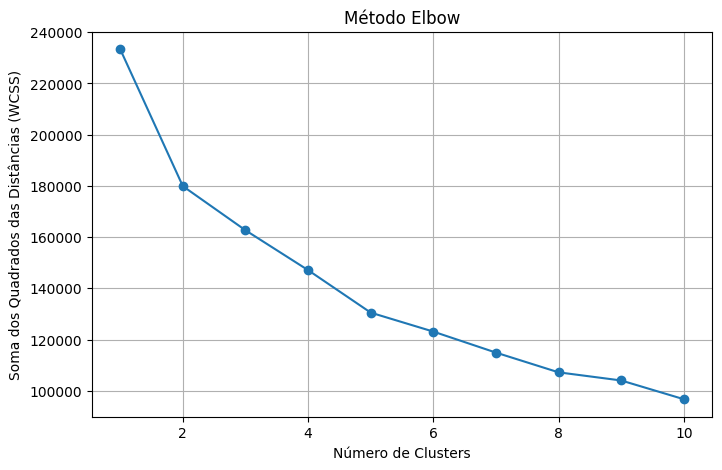

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar o dataset padronizado
data_scaled = pd.read_parquet('../data/scaled_ACC_INTAKES_OUTCOMES.parquet')

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecionar as colunas relevantes para a clusterização
cluster_features = [
    "age_upon_intake_(years)_scaled",
    "age_upon_outcome_(years)_scaled",
    "time_in_shelter_days_scaled",
    "outcome_type_Adoption       ",
    "outcome_type_Died           ",
    "outcome_type_Euthanasia     ",
    "outcome_type_Missing        ",
    "outcome_type_Return to Owner",
    "outcome_type_Transfer       ",
    "sex_upon_outcome_Intact Female",
    "sex_upon_outcome_Intact Male  ",
    "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female",
    "sex_upon_outcome_Unknown      ",
    "animal_type_Bir",
    "animal_type_Cat",
    "animal_type_Dog",
    "animal_type_Oth",
    "intake_condition_Aged   ",
    "intake_condition_Feral  ",
    "intake_condition_Injured",
    "intake_condition_Normal ",
    "intake_condition_Nursing",
    "intake_condition_Other  ",
    "intake_condition_Pregnan",
    "intake_condition_Sick   ",
    "sex_upon_intake_Intact Female",
    "sex_upon_intake_Intact Male  ",
    "sex_upon_intake_Neutered Male",
    "sex_upon_intake_Spayed Female",
    "sex_upon_intake_Unknown      ",
    "is_mix_breed",
    "color_Black",
    "color_Brown/Chocolate",
    "color_Gray/Blue",
    "color_Other_Colors",
    "color_Patterned",
    "color_Red/Orange",
    "color_White",
    "color_Yellow/Gold/Cream"
]

# Método Elbow: calcular a soma dos quadrados das distâncias (WCSS)
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled[cluster_features])
    sse.append(kmeans.inertia_)

# Plotar o gráfico Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Método Elbow')
plt.xlabel('Número de Clusters')
plt.ylabel('Soma dos Quadrados das Distâncias (WCSS)')
plt.grid(True)
plt.show()



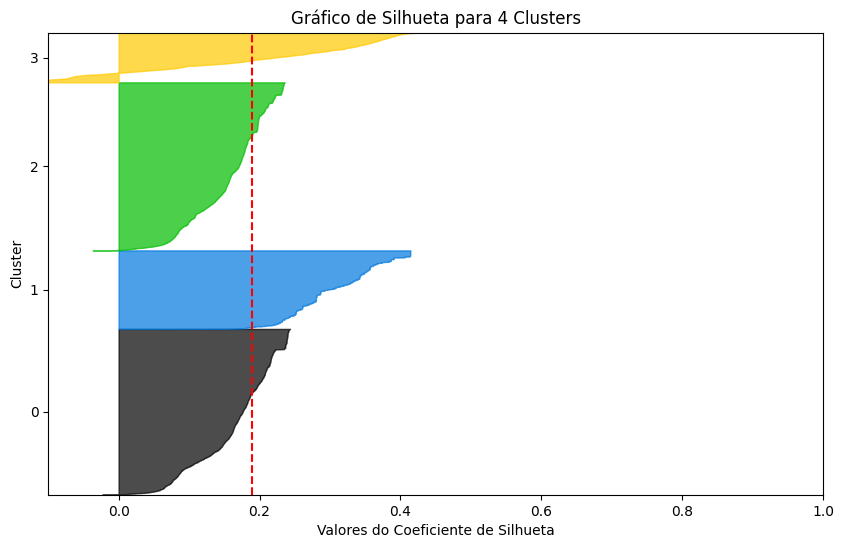

In [3]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Definir o número de clusters ideal (usando o valor que você obteve do Método Elbow)
n_clusters = 4

# Criar o modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(data_scaled[cluster_features])

# Calcular o silhouette score para cada ponto
silhouette_vals = silhouette_samples(data_scaled[cluster_features], labels)
silhouette_avg = silhouette_score(data_scaled[cluster_features], labels)

# Plotar o Silhouette Plot
fig, ax = plt.subplots(figsize=(10, 6))

y_lower, y_upper = 0, 0
yticks = []

for i in range(n_clusters):
    ith_cluster_silhouette_vals = silhouette_vals[labels == i]
    ith_cluster_silhouette_vals.sort()
    y_upper += len(ith_cluster_silhouette_vals)
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_vals,
                     facecolor=color, edgecolor=color, alpha=0.7)
    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

# Linha vertical para a pontuação média de silhouette
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

# Configurações do gráfico
ax.set_title(f'Gráfico de Silhueta para {n_clusters} Clusters')
ax.set_xlabel('Valores do Coeficiente de Silhueta')
ax.set_ylabel('Cluster')

ax.set_yticks(yticks)
ax.set_yticklabels([str(i) for i in range(n_clusters)])

ax.set_xlim([-0.1, 1])
ax.set_ylim([0, len(data_scaled[cluster_features])])

plt.show()


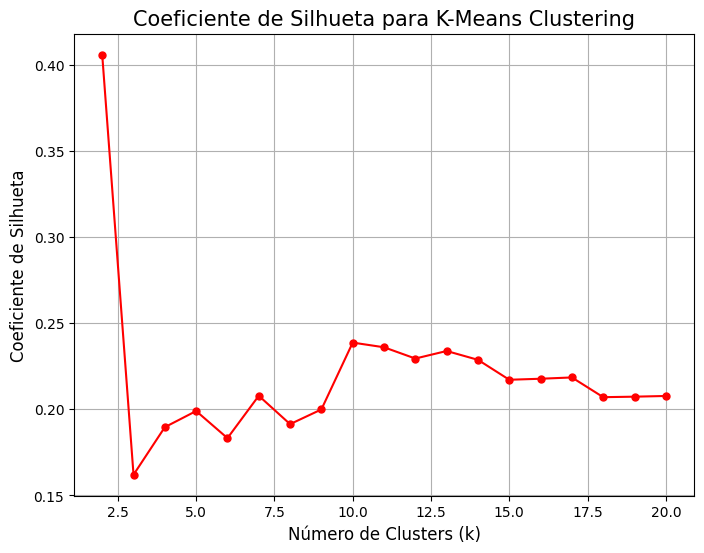

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Carregar o dataset padronizado
data_scaled = pd.read_parquet('../data/scaled_ACC_INTAKES_OUTCOMES.parquet')

# Selecionar as features relevantes para a clusterização
cluster_features = [
    "age_upon_intake_(years)_scaled", "age_upon_outcome_(years)_scaled",
    "time_in_shelter_days_scaled", "outcome_type_Adoption       ",
    "outcome_type_Died           ", "outcome_type_Euthanasia     ",
    "outcome_type_Missing        ", "outcome_type_Return to Owner",
    "outcome_type_Transfer       ", "sex_upon_outcome_Intact Female",
    "sex_upon_outcome_Intact Male  ", "sex_upon_outcome_Neutered Male",
    "sex_upon_outcome_Spayed Female", "sex_upon_outcome_Unknown      ",
    "animal_type_Bir", "animal_type_Cat", "animal_type_Dog", "animal_type_Oth",
    "intake_condition_Aged   ", "intake_condition_Feral  ", "intake_condition_Injured",
    "intake_condition_Normal ", "intake_condition_Nursing", "intake_condition_Other  ",
    "intake_condition_Pregnan", "intake_condition_Sick   ", "sex_upon_intake_Intact Female",
    "sex_upon_intake_Intact Male  ", "sex_upon_intake_Neutered Male",
    "sex_upon_intake_Spayed Female", "sex_upon_intake_Unknown      ",
    "is_mix_breed", "color_Black", "color_Brown/Chocolate", "color_Gray/Blue",
    "color_Other_Colors", "color_Patterned", "color_Red/Orange", "color_White", 
    "color_Yellow/Gold/Cream"
]

# Definir valores de k a serem testados
k_values = range(2, 21)  # Testando de 2 a 20 clusters

# Lista para armazenar a média de silhueta para cada valor de k
silhouette_avgs = []

# Loop para calcular o coeficiente de silhueta para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled[cluster_features])
    silhouette_avg = silhouette_score(data_scaled[cluster_features], labels)
    silhouette_avgs.append(silhouette_avg)

# Plotar o gráfico do coeficiente de silhueta
plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_avgs, 'o-', color='red', markersize=5)
plt.title('Coeficiente de Silhueta para K-Means Clustering', fontsize=15)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Coeficiente de Silhueta', fontsize=12)
plt.grid(True)

# Salvar ou exibir o gráfico
plt.savefig('silhouette_plot.png')
plt.show()
